In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from numpy import log,log1p
from scipy.stats import boxcox 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,balanced_accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
warnings.filterwarnings("ignore")
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
veri = pd.read_csv("../input/nasa-nearest-earth-objects/neo.csv")

Tek Çeşitli veriler algoritma için gereksizdir. Bu yüzden varsa çıkaralım.

In [3]:
#Data Cleaning
#Veri Temizleme
#Tek çeşitli veriler algoritma için gereksizdir 
#isim , id gibi veriler algoritmayı bozan verilerdir. Bu tip veriler çıkarılmalıdır
veri.orbiting_body.unique()
veri.sentry_object.unique()
veri = veri.drop(["id","name","orbiting_body","sentry_object"],axis = 1)
veri

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [4]:
#Eksik veri analizi
#Empty data analysis
veri.info()
#Veride herhangi bir eksiklik bulunmuyor.
#There are no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


<AxesSubplot:xlabel='hazardous', ylabel='count'>

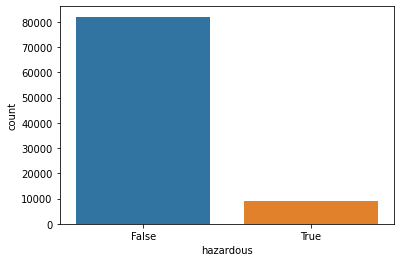

In [5]:
veri.hazardous.astype(int)
sns.countplot(x = "hazardous",data = veri)


<AxesSubplot:>

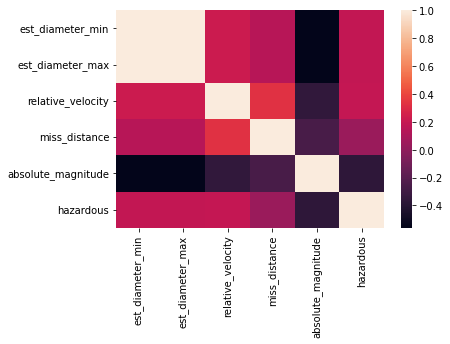

In [6]:
#Correalation Matrix
veri.corr()
sns.heatmap(veri.corr())

In [7]:
#Ölçeklendirme
#Scaling
ss = StandardScaler()
Y = veri[["hazardous"]]
X = veri.drop(["hazardous"],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,
                                             test_size = 0.3,
                                             random_state=42)
xtrain_s = ss.fit_transform(xtrain)
xtest_s = ss.fit_transform(xtest)
xtrain_s

array([[-0.34898654, -0.34898654,  0.11358424, -1.37924096,  0.57557602],
       [-0.19392342, -0.19392342,  1.83949295, -1.2607604 , -0.21855478],
       [-0.17102268, -0.17102268,  1.42329698, -1.29343252, -0.28760964],
       ...,
       [ 0.28554648,  0.28554648,  0.17180833,  0.30380975, -1.04721301],
       [ 0.52683057,  0.52683057,  0.09953925,  0.95585474, -1.26473579],
       [-0.1757731 , -0.1757731 , -1.00733774, -0.63591316, -0.27379867]])

[0.8880408058419874,
 0.9041503064107739,
 0.8953799860555576,
 0.9053245752449451,
 0.8984991376463249,
 0.905361271146013,
 0.8993798392719533,
 0.9062786686727092,
 0.9037833474000954,
 0.9069391948919305]

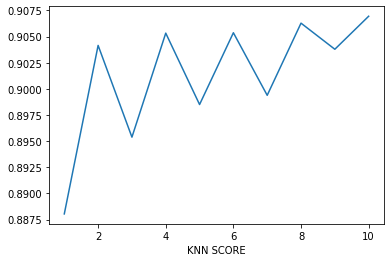

In [8]:
#Modelleme
#Bu algoritmada KNN , Decision Tree , Random Forest ve Lojistik regresyon Algoritmaları kullanılacaktır.

#Nesne oluştruma
Lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()

#eğitim
#knn
knn_scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain_s,ytrain)
    knn_scores.append(knn.score(xtest_s,ytest))
    
plt.plot(range(1,11),knn_scores),
plt.xlabel("KNN SCORE")
knn_scores

[0.8921507467615867,
 0.9072327621004733,
 0.9045906572235881,
 0.9108289604051227,
 0.9074162416058126,
 0.9135077611830759,
 0.9089574694506624,
 0.9139848078969579,
 0.9124435800521081,
 0.9140581996990936]

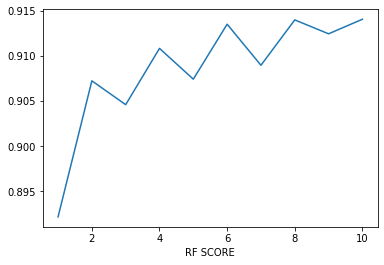

In [9]:
#RandomForest
rf_scores = []
for j in range(1,11):
    rf = RandomForestClassifier(n_estimators = j)
    rf.fit(xtrain,ytrain)
    rf_scores.append(rf.score(xtest,ytest))
plt.plot(range(1,11),rf_scores)
plt.xlabel("RF SCORE")
max(rf_scores)
rf_scores

In [10]:
#LogisticRegression
Lr = LogisticRegression()
Lr.fit(xtrain,ytrain)
Lr_score = Lr.score(xtest,ytest)
Lr_score

0.9026090785659242

In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc_score = dtc.score(xtest,ytest)
dtc_score

0.8931782319914866

In [12]:
#Metrikler ile model karşılaştırılması
#Comparison models with error metrics
knn = KNeighborsClassifier(n_neighbors = 8)
rf = RandomForestClassifier(n_estimators = 8)
knn.fit(xtrain,ytrain)
rf.fit(xtrain,ytrain)
bas_lr = balanced_accuracy_score(Lr.predict(xtest),ytest)
bas_dtc = balanced_accuracy_score(dtc.predict(xtest),ytest)
bas_rf = balanced_accuracy_score(rf.predict(xtest),ytest)
bas_knn = balanced_accuracy_score(knn.predict(xtest),ytest)
bas_scores = [bas_lr,bas_dtc,bas_rf,bas_knn]
bas_scores
clfs= ["Lr","dtc","rf","knn"]


<AxesSubplot:>

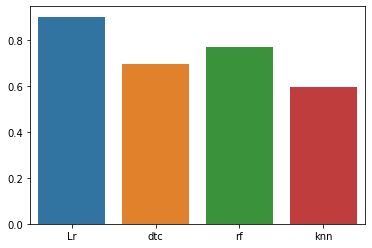

In [13]:
sns.barplot(x=clfs,y=bas_scores)